In [64]:
from IPython.core.display import HTML
def css_styling():
    styles = open('styles/custom.css', 'r').read()
    return HTML(styles)
css_styling()

# 2D Interpolation (and above)


## Scope

* Finite number $N$ of data points are available: $P_i = (x_i, y_i)$ and associated values $z_i$ , $i \in \lbrace 0, \ldots, N \rbrace$ 
* ND interpolation differs from 1D interpolation because the notion of neighbourhood is less obvious.

https://en.wikipedia.org/wiki/Interpolation

In [65]:
# Setup
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
params = {'font.size'     : 14,
          'figure.figsize':(15.0, 8.0),
          'lines.linewidth': 2.,
          'lines.markersize': 15,}
matplotlib.rcParams.update(params)


## Let's do it with Python

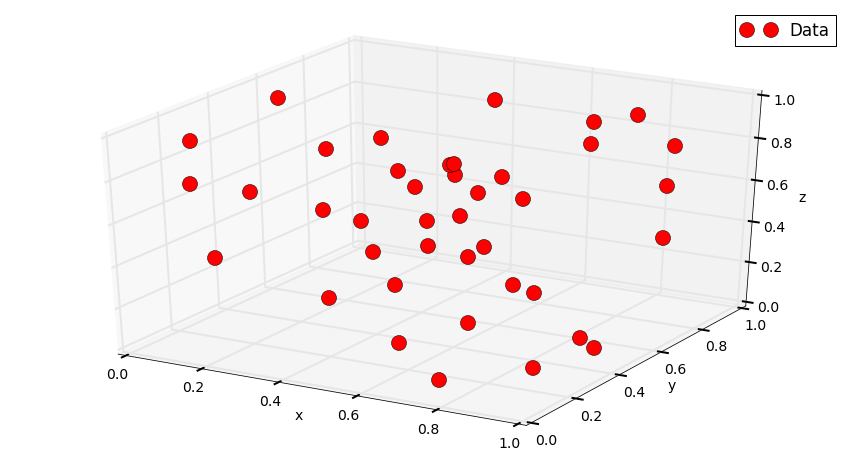

In [66]:
Ni = 40
Pi = np.random.rand(Ni, 2)
Xi, Yi = Pi[:,0], Pi[:,1]
Zi = np.random.rand(Ni)


import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(Xi, Yi, Zi, "or", label='Data')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


## Neighbours and connectivity: Delaunay mesh

Triangular mesh over a convex domain

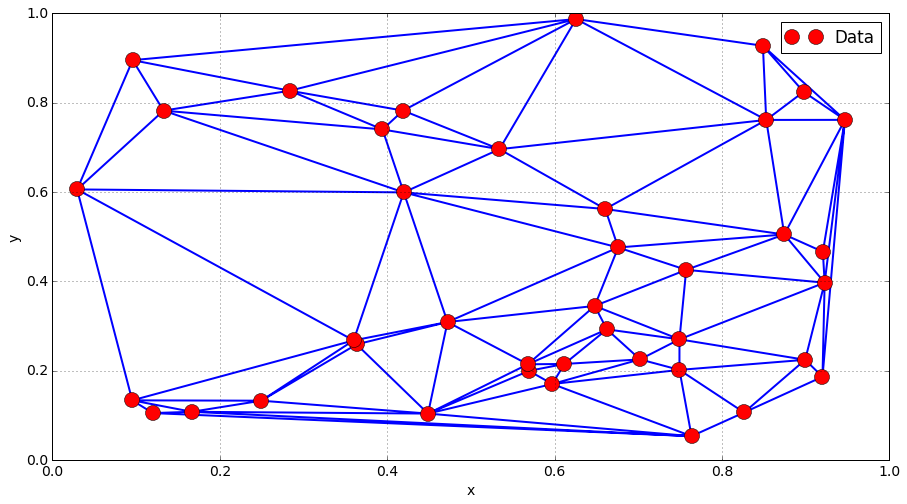

In [67]:
from scipy.spatial import Delaunay
Pi = np.array([Xi, Yi]).transpose()
tri = Delaunay(Pi)
plt.triplot(Xi, Yi , tri.simplices.copy())
plt.plot(Xi, Yi, "or", label = "Data")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

   ## Interpolation 

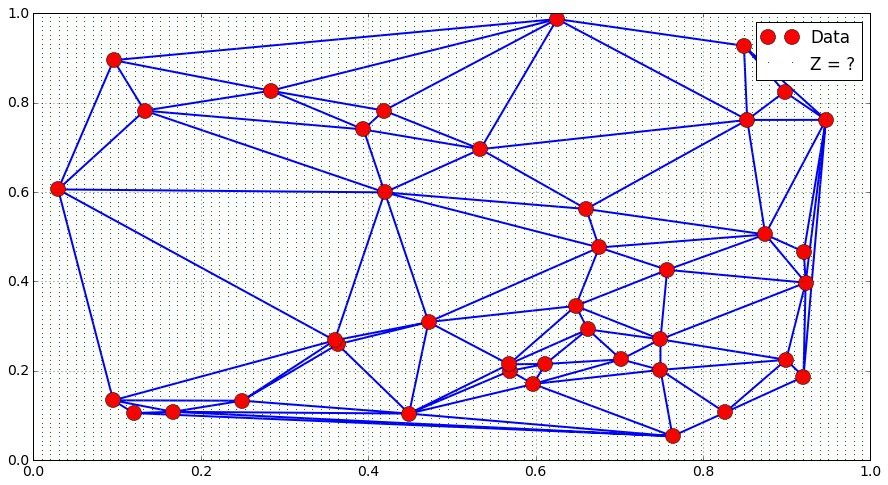

In [68]:
N = 100
x = np.linspace(0., 1., N)
y = np.linspace(0., 1., N)
X, Y = np.meshgrid(x, y)
P = np.array([X.flatten(), Y.flatten() ]).transpose()
plt.plot(Xi, Yi, "or", label = "Data")
plt.triplot(Xi, Yi , tri.simplices.copy())
plt.plot(X.flatten(), Y.flatten(), "g,", label = "Z = ?")
plt.legend()
plt.grid()
plt.show()

## Nearest interpolation

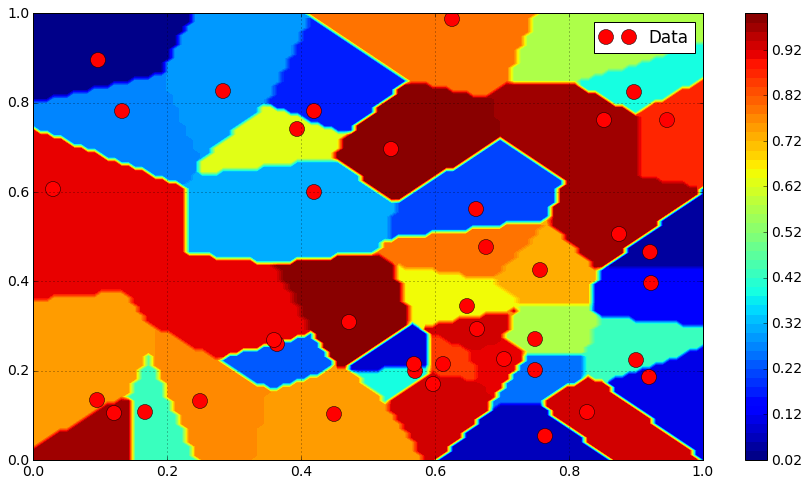

In [69]:
from scipy.interpolate import griddata
Z_nearest = griddata(Pi, Zi, P, method = "nearest").reshape([N, N])
plt.contourf(X, Y, Z_nearest, 50)
plt.plot(Xi, Yi, "or", label = "Data")
plt.colorbar()
plt.legend()
plt.grid()
plt.show()

## Linear interpolation

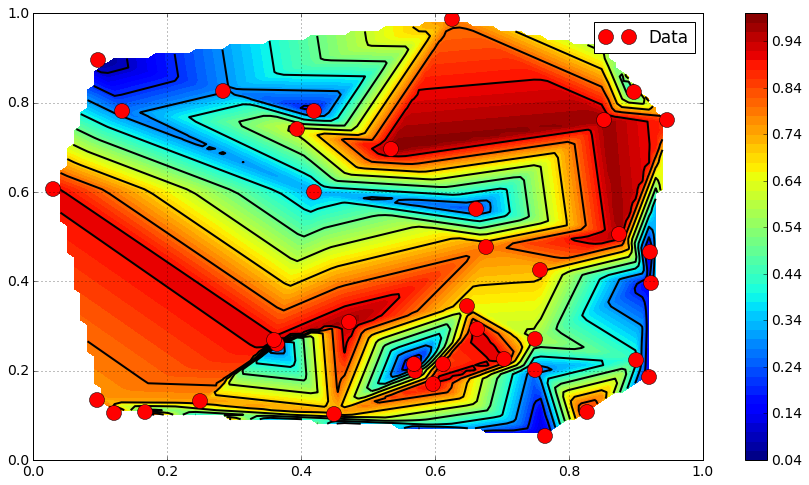

In [70]:
from scipy.interpolate import griddata
Z_linear = griddata(Pi, Zi, P, method = "linear").reshape([N, N])
plt.contourf(X, Y, Z_linear, 50, cmap = mpl.cm.jet)
plt.colorbar()
plt.contour(X, Y, Z_linear, 10, colors = "k")
#plt.triplot(Xi, Yi , tri.simplices.copy(), color = "k")
plt.plot(Xi, Yi, "or", label = "Data")
plt.legend()
plt.grid()
plt.show()

## Higher order interpolation

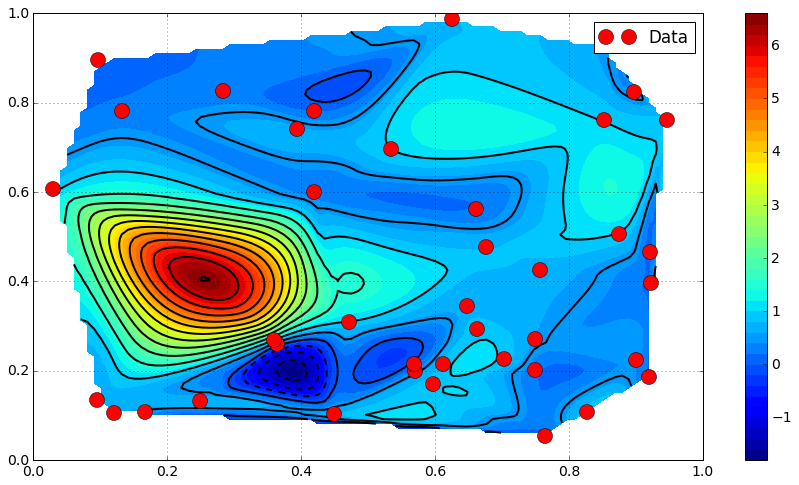

In [74]:
from scipy.interpolate import griddata
Z_cubic = griddata(Pi, Zi, P, method = "cubic").reshape([N, N])
plt.contourf(X, Y, Z_cubic, 50, cmap = mpl.cm.jet)
plt.colorbar()
plt.contour(X, Y, Z_cubic, 20, colors = "k")
#plt.triplot(Xi, Yi , tri.simplices.copy(), color = "k")
plt.plot(Xi, Yi, "or", label = "Data")
plt.legend()
plt.grid()
plt.show()

## Comparison / Discussion

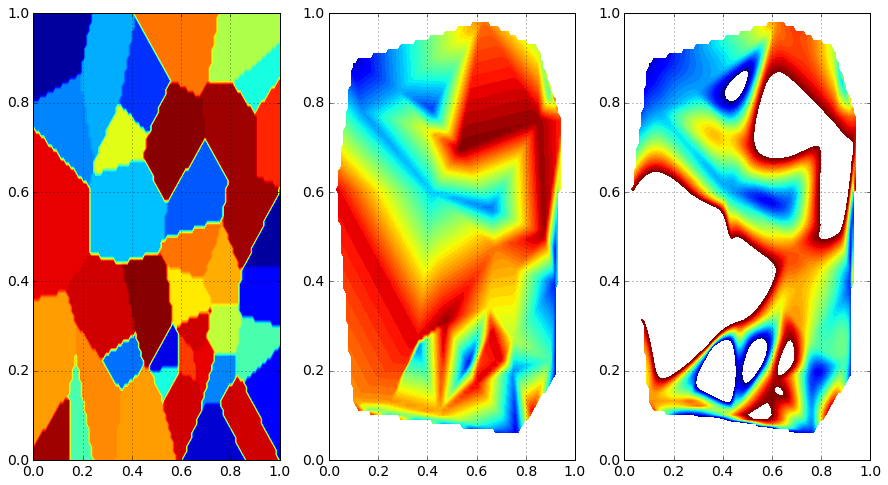

In [81]:
levels = np.linspace(0., 1., 50)
fig = plt.figure()
ax =  fig.add_subplot(1, 3, 1)
plt.contourf(X, Y, Z_nearest, levels)
plt.grid()
ax =  fig.add_subplot(1, 3, 2)
plt.contourf(X, Y, Z_linear, levels)
plt.grid()
ax =  fig.add_subplot(1, 3, 3)
plt.contourf(X, Y, Z_cubic, levels)
plt.grid()